In [1]:
# import libraries
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_punctuation,strip_multiple_whitespaces,remove_stopwords
from gensim.models import TfidfModel
import pandas as pd
from gensim.corpora import Dictionary
import numpy as np
import xgboost


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
from scipy.stats import randint

from gensim.corpora import Dictionary

import xgboost as xgb


In [2]:
# read data from github

url = "https://github.com/philipayazi/Disaster_Tweets/raw/master/nlp-getting-started/train.csv"
train_df = pd.read_csv(url)

In [3]:
# observe how the data looks
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# clean tweets of white spaces, punctuations, stopwords, and make all letters lowercase
custom_filters = [lambda x: x.lower(),
                  strip_multiple_whitespaces,
                  strip_punctuation,
                  remove_stopwords]

def clean_string(row):
    return preprocess_string(row['text'], custom_filters)

In [5]:
# append cleaned tweets to dataframe
train_df['cleaned_tweets'] = train_df.apply(clean_string, axis=1)

train_df.head()

,id,keyword,location,text,target,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, wildfires, evacuati..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [6]:
# convert cleaned_tweets column to a list so that we can create a 2D array
cleaned_tweets_lst = train_df['cleaned_tweets'].to_list()

In [7]:
# make cleaned_tweets_lst a list of lists i.e. a 2D array
cleaned_tweets_lst = [' '.join(cleaned_tweet) for cleaned_tweet in cleaned_tweets_lst]

In [ ]:
# convert cleaned_tweets column to dictionary
# dct = Dictionary(train_df.cleaned_tweets)

In [ ]:
# convert dictionary to matrix
# gen_corpus = [dct.doc2bow(line) for line in train_df.cleaned_tweets]

In [ ]:
# gen_corpus[:5]

In [ ]:
# create model

# td_model = TfidfModel(gen_corpus)

In [ ]:
# model

In [ ]:
# fit model
# vector = model[corpus]

In [ ]:
# print(vector)

In [ ]:
# vector_0 = model[corpus[0]]

In [ ]:
# vector_1 = model[corpus[1]]

In [ ]:
# The above code does not seem to be correct because it is treating redundent words as unique. Create dictionary of
# frequency counts of unique words
# from collections import defaultdict
# frequency = defaultdict(int)
# for text in train_df.cleaned_tweets:
#     for token in text:
#         frequency[token] += 1

In [ ]:
# convert default dictionary to dictionary
# frequency = dict(frequency)

#EDA of Data Set

In [7]:
# Determine if training data set is balanced
target_count = train_df.groupby('target').count().drop(columns = ['id', 'keyword', 'location', 'text'], axis=1)

In [8]:
# Data shows 57% to 43% disaster non related to related tweets
target_count

,cleaned_tweets
target,
0,4342
1,3271


In [9]:
target_pct = round(target_count.div(target_count['cleaned_tweets'].sum()) * 100, 2)

In [10]:
target_pct = target_pct.rename(columns={'cleaned_tweets': "percent"})

In [11]:
target_pct = target_pct.reset_index()

In [12]:
target_pct = target_pct.replace({"target":{0: "False", 1: "True"}})

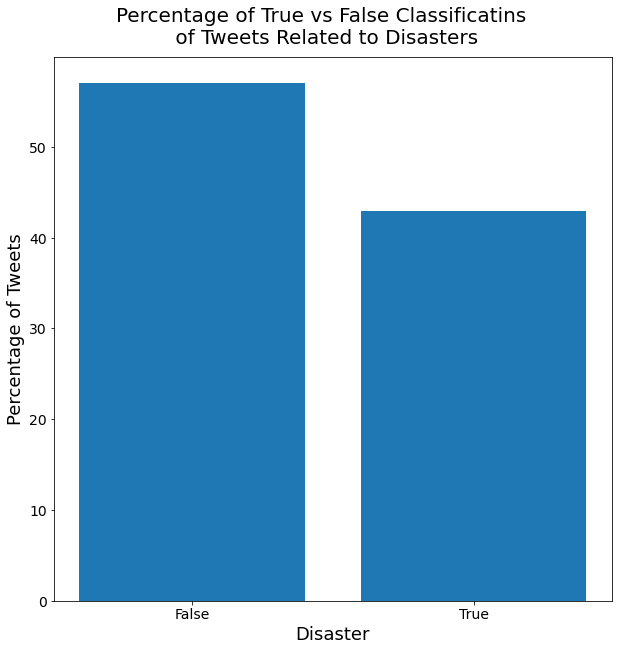

In [13]:
from matplotlib import pyplot as plt    

fig = plt.figure(figsize=(10,10))
plt.bar(target_pct['target'], target_pct['percent'])
fig.suptitle('Percentage of True vs False Classificatins \n of Tweets Related to Disasters', fontsize=20, y=.95)
plt.xlabel('Disaster', fontsize=18)
plt.ylabel('Percentage of Tweets', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.savefig('classification_balance.png')

#Split dat into Train and Test sets

In [8]:
X_train_list, X_test_list, y_train_list, y_test_list = train_test_split(cleaned_tweets_lst, train_df['target'], test_size =0.3, random_state =42)

# All of these analyses are on dense vectors. We need to analyze sparse vectors

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split

In [ ]:
# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(cleaned_tweets_lst, train_df['target'], test_size = 0.3, random_state = 42)

In [19]:
train_corpus = X_train_list

train_vectorizer = CountVectorizer()

X_train = train_vectorizer.fit_transform(train_corpus)

In [20]:
test_corpus = X_test_list

X_test = train_vectorizer.transform(test_corpus)

In [ ]:
X_train_shaped = X_train.shape

X_train_shaped

(5329, 16712)

In [ ]:
X_test_shaped = X_test.shape

X_test_shaped

(2284, 16712)

In [ ]:
train_vectorizer.vocabulary_

In [ ]:
feature_names = train_vectorizer.get_feature_names()

In [ ]:
sparse_vectors = X_train.toarray()

In [ ]:
sparse_vectors[0]

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# model = LogisticRegression().fit(X_train, y_train_split)

In [ ]:
# model.score(X_train, y_train_split)

0.9711015199849878

In [ ]:
# model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
# model.score(X_test, y_test_split)

0.7981611208406305

## Feature Engieering via "CountVectorizer"  

- From List to Matrix via "CountVectorizer" 

- List shape: N_tweets x 1
- Matrix shape: N_tweets x N_WordsInCorpus

In [22]:
train_vectorizer = CountVectorizer()
Xcv_train_matrix = train_vectorizer.fit_transform(X_train_list)
Xcv_test_matrix = train_vectorizer.transform(X_test_list)

In [23]:
# # Scale feature data (most likely not needed for CV features)

# x_scaler = StandardScaler(with_mean=False).fit(Xcv_train_matrix)

# Xcv_train_matrix = x_scaler.transform(Xcv_train_matrix)
# Xcv_test_matrix = x_scaler.transform(Xcv_test_matrix)

In [24]:
# Make sure the length of train and test matrix are the same
print('Train matrix shape', Xcv_train_matrix.shape)
print('Test matrix shape', Xcv_test_matrix.shape)

Train matrix shape (5329, 16712)
Test matrix shape (2284, 16712)


In [ ]:
feature_names = train_vectorizer.get_feature_names()
#print(feature_names)
train_vectorizer.vocabulary_


In [26]:
sparse_vectors = Xcv_train_matrix.toarray()

Tweet_nbr =0;
Word_nbr =1820;  #e.g., 1820 = 'australia'

sparse_vectors[0,1820]  # we get ones (or twos) at the right place

2

## Features: CountVectorizer, Classifier: Logistic Regression

In [27]:
model_CV_LR =LogisticRegression(n_jobs=-1).fit(Xcv_train_matrix, y_train_list)

CV_LR_score_train =model_CV_LR.score(Xcv_train_matrix, y_train_list)
#model_LR.predict(Xcv_test_matrix)
CV_LR_score_test =model_CV_LR.score(Xcv_test_matrix, y_test_list)

print('score for test data:', CV_LR_score_test)
print(classification_report(y_test_list, model_CV_LR.predict(Xcv_test_matrix)) )

score for test data: 0.7981611208406305
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1318
           1       0.80      0.70      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



## Features: CountVectorizer,  Classifier: Randon Forest

In [50]:
model_CV_RF =RandomForestClassifier(n_jobs=-1).fit(Xtf_train_matrix, y_train_list)

CV_RF_score_train =model_CV_RF.score(Xcv_train_matrix, y_train_list)

CV_RF_score_test =model_CV_RF.score(Xcv_test_matrix, y_test_list)

print('score for test data:', CV_RF_score_test)
print(classification_report(y_test_list, model_CV_RF.predict(Xcv_test_matrix)) )

score for test data: 0.7697022767075307
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1318
           1       0.77      0.64      0.70       966

    accuracy                           0.77      2284
   macro avg       0.77      0.75      0.76      2284
weighted avg       0.77      0.77      0.77      2284



## Features: CountVectorizer,  Classifier: XGBooster

In [47]:
model_CV_XGB = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model_CV_XGB.fit(Xcv_train_matrix, y_train_list)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
y_pred = model_TF_XGB.predict(Xcv_test_matrix)
#print(confusion_matrix(y_test_list, y_pred))

CV_XGB_score_train =model_CV_XGB.score(Xcv_train_matrix, y_train_list)
CV_XGB_score_test =model_CV_XGB.score(Xcv_test_matrix, y_test_list)

print('score for test data:', CV_XGB_score_test)
print(classification_report(y_test_list, model_CV_XGB.predict(Xcv_test_matrix)) )

score for test data: 0.7513134851138353
              precision    recall  f1-score   support

           0       0.72      0.95      0.81      1318
           1       0.87      0.49      0.62       966

    accuracy                           0.75      2284
   macro avg       0.79      0.72      0.72      2284
weighted avg       0.78      0.75      0.73      2284



## Features: TFIDF,  Classifier: Logistic Regression

In [28]:
train_vectorizer = TfidfVectorizer()

In [29]:
# fit and transform the train data and transform the test data
Xtf_train_matrix = train_vectorizer.fit_transform(X_train_list)
Xtf_test_matrix = train_vectorizer.transform(X_test_list)

In [30]:
# # Scale feature data (most likely not needed for CV features)
# x_scaler = StandardScaler(with_mean=False).fit(Xtf_train_matrix)

# Xtf_train_matrix = x_scaler.transform(Xtf_train_matrix)
# Xtf_test_matrix = x_scaler.transform(Xtf_test_matrix)

In [31]:
# Confirm the shape of the matrices
print('Train matrix shape', Xtf_train_matrix.shape)
print('Test matrix shape', Xtf_test_matrix.shape)

Train matrix shape (5329, 16712)
Test matrix shape (2284, 16712)


In [32]:
Xtf_train_matrix[0,1820]

0.49047078831542945

In [33]:
Xtf_train_matrix[0,276]  #w/out scaling was: 0.19644613494912055

0.19644613494912055

In [ ]:
feature_names = train_vectorizer.get_feature_names()
## print(feature_names)
train_vectorizer.vocabulary_

In [36]:
# fit logistic regression to train data
model_TF_LR =LogisticRegression(n_jobs=-1).fit(Xtf_train_matrix, y_train_list)

In [37]:
# find stats of train and test data
TF_LR_score_train =model_TF_LR.score(Xtf_train_matrix, y_train_list)

TF_LR_score_test =model_TF_LR.score(Xtf_test_matrix, y_test_list)

print('score for test data:', TF_LR_score_test)
print(classification_report(y_test_list, model_TF_LR.predict(Xtf_test_matrix)) )

score for test data: 0.7990367775831874
              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1318
           1       0.81      0.69      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.80      2284



## Features: TFIDF,  Classifier: Randon Forest

In [39]:
# fit classifier to train data
model_TF_RF =RandomForestClassifier(n_jobs=-1).fit(Xtf_train_matrix, y_train_list)

In [40]:
# find stats on train and test data
TF_RF_score_train =model_TF_RF.score(Xtf_train_matrix, y_train_list)

TF_RF_score_test =model_TF_RF.score(Xtf_test_matrix, y_test_list)

print('score for test data:', TF_RF_score_test)
print(classification_report(y_test_list, model_TF_RF.predict(Xtf_test_matrix)) )

score for test data: 0.7880910683012259
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1318
           1       0.83      0.63      0.72       966

    accuracy                           0.79      2284
   macro avg       0.80      0.77      0.77      2284
weighted avg       0.79      0.79      0.78      2284



In [41]:
model_TF_RF.feature_importances_

array([1.46534115e-04, 9.03923681e-06, 8.28227209e-06, ...,
       4.31367089e-05, 1.10272671e-04, 3.10040005e-10])

In [42]:
# find most important words contributing to the classifier
feat_sortedlist =sorted(zip(model_TF_RF.feature_importances_, feature_names), reverse=True)

# top 12 features
feat_sortedlist[0:12]

[(0.02776535893667571, 'http'),
 (0.007220604058553893, 'hiroshima'),
 (0.007061272107765204, 'fires'),
 (0.0063462569748276325, 'california'),
 (0.005579276193196549, 'killed'),
 (0.005204557248446957, 'buildings'),
 (0.0049482305700996165, 'suicide'),
 (0.004896004046125661, 'storm'),
 (0.004713018346746325, 'disaster'),
 (0.004501487769292689, 'wildfire'),
 (0.004236014438021529, 'bombing'),
 (0.004219624892963265, 'police')]

## Features: TFIDF,  Classifier: XGBooster

In [43]:
# fit classifier to train data
model_TF_XGB = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model_TF_XGB.fit(Xtf_train_matrix, y_train_list)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
y_pred = model_TF_XGB.predict(Xtf_test_matrix)
#print(confusion_matrix(y_test_list, y_pred))

# find stats of test data
TF_XGB_score_train =model_TF_XGB.score(Xtf_train_matrix, y_train_list)
TF_XGB_score_test =model_TF_XGB.score(Xtf_test_matrix, y_test_list)

print('score for test data:', TF_XGB_score_test)
print(classification_report(y_test_list, model_TF_XGB.predict(Xtf_test_matrix)) )

score for test data: 0.7351138353765324
              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1318
           1       0.88      0.44      0.58       966

    accuracy                           0.74      2284
   macro avg       0.79      0.70      0.69      2284
weighted avg       0.77      0.74      0.71      2284



## Summary of results so far

In [51]:
print('--------- CV features ------------------------')
print('score for CV->LR:', CV_LR_score_test)
print('score for CV->RF:', CV_RF_score_test)
print('score for CV->XGB:', CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for TF->LR:', TF_LR_score_test)
print('score for TF->RF:', TF_RF_score_test)
print('score for TF->XGB:', TF_XGB_score_test)


--------- CV features ------------------------
score for CV->LR: 0.7981611208406305
score for CV->RF: 0.7697022767075307
score for CV->XGB: 0.7513134851138353
--------- TFIDF features ---------------------
score for TF->LR: 0.7990367775831874
score for TF->RF: 0.7880910683012259
score for TF->XGB: 0.7351138353765324


## Tune CV+LR  --- HyperParameter tuning via "GridSearch"

In [52]:
model =LogisticRegression(n_jobs=-1)    # gstmodel: grid search tuned model

# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'C': [.1, .2, .5, 1, 2, 3, 5, 10], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear']} 

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xcv_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_CV_LR_score_test =grid.score(Xcv_test_matrix, y_test_list)
print(GST_CV_LR_score_test)

# # Calculate classification report for Tuned Model
# predictions = grid.predict(Xcv_test_matrix)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, predictions,
#                             target_names=["blue", "red"]))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.4s


{'C': 0.2, 'solver': 'newton-cg'}
0.8016637478108581


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.1s finished


In [53]:
print(classification_report(y_test_list, grid.predict(Xcv_test_matrix)) )

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1318
           1       0.83      0.67      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



## Tune TF+LR  --- HyperParameter tuning via "GridSearch"

In [54]:
model =LogisticRegression(n_jobs=-1)    
param_grid = {'C': [.1, .2, .5, 1, 2, 3, 5, 10], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear']} 
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)
grid.fit(Xtf_train_matrix, y_train_list)
print(grid.best_params_)

# score with the tuned model
GST_TF_LR_score_test =grid.score(Xtf_test_matrix, y_test_list)
print(GST_TF_LR_score_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s


{'C': 2, 'solver': 'newton-cg'}
0.7990367775831874


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.4s finished


In [55]:
print(classification_report(y_test_list, grid.predict(Xtf_test_matrix)) )

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



## Tune CV+RF  --- HyperParameter tuning via "GridSearch"

In [56]:
model =RandomForestClassifier(n_jobs=-1)    

param_grid = {'n_estimators': [50, 100],     
              'max_features': ['sqrt', 'log2']} 
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xcv_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_CV_RF_score_test =grid.score(Xcv_test_matrix, y_test_list)

print(GST_CV_RF_score_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


{'max_features': 'sqrt', 'n_estimators': 50}
0.7859019264448336


In [57]:
print(classification_report(y_test_list, grid.predict(Xcv_test_matrix)) )

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1318
           1       0.85      0.60      0.70       966

    accuracy                           0.79      2284
   macro avg       0.80      0.76      0.77      2284
weighted avg       0.80      0.79      0.78      2284



## Tune TF+RF  --- HyperParameter tuning via "GridSearch"

In [58]:
model =RandomForestClassifier(n_jobs=-1)    

param_grid = {'n_estimators': [50, 100],     
              'max_features': ['sqrt', 'log2']} 
grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xtf_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_TF_RF_score_test =grid.score(Xtf_test_matrix, y_test_list)

print(GST_TF_RF_score_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


{'max_features': 'sqrt', 'n_estimators': 100}
0.7933450087565674


In [59]:
print(classification_report(y_test_list, grid.predict(Xtf_test_matrix)) )

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1318
           1       0.83      0.64      0.72       966

    accuracy                           0.79      2284
   macro avg       0.80      0.77      0.78      2284
weighted avg       0.80      0.79      0.79      2284



## Tune CV+XGB  --- HyperParameter tuning via "GridSearch"

In [60]:
model = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
param_grid = {'n_estimators': [100, 150],   
              'learning_rate': ['.1', '.3']} 

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xcv_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_CV_XGB_score_test =grid.score(Xcv_test_matrix, y_test_list)

print(GST_CV_XGB_score_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.0s finished


{'learning_rate': '.3', 'n_estimators': 150}
0.781523642732049


In [62]:
print(classification_report(y_test_list, grid.predict(Xcv_test_matrix)) )

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1318
           1       0.83      0.61      0.70       966

    accuracy                           0.78      2284
   macro avg       0.79      0.76      0.77      2284
weighted avg       0.79      0.78      0.77      2284



## Tune TF+XGB  --- HyperParameter tuning via "GridSearch"

In [63]:
model = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
param_grid = {'n_estimators': [100, 150],   
              'learning_rate': ['.1', '.3']} 

grid = GridSearchCV(model, param_grid, verbose=3, n_jobs=-1)

grid.fit(Xtf_train_matrix, y_train_list)

print(grid.best_params_)

# score with the tuned model
GST_TF_XGB_score_test =grid.score(Xtf_test_matrix, y_test_list)

print(GST_TF_XGB_score_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   41.5s finished


{'learning_rate': '.3', 'n_estimators': 150}
0.7631348511383538


In [65]:
print(classification_report(y_test_list, grid.predict(Xtf_test_matrix)) )

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1318
           1       0.82      0.57      0.67       966

    accuracy                           0.76      2284
   macro avg       0.78      0.74      0.74      2284
weighted avg       0.77      0.76      0.75      2284



## Results

In [66]:
print(' ')
print('*** Default Params')
print('--------- CV features ------------------------')
print('score for CV->LR:', CV_LR_score_test)
print('score for CV->RF:', CV_RF_score_test)
print('score for CV->XGB:', CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for TF->LR:', TF_LR_score_test)
print('score for TF->RF:', TF_RF_score_test)
print('score for TF->XGB:', TF_XGB_score_test)

 
*** Default Params
--------- CV features ------------------------
score for CV->LR: 0.7981611208406305
score for CV->RF: 0.7697022767075307
score for CV->XGB: 0.7513134851138353
--------- TFIDF features ---------------------
score for TF->LR: 0.7990367775831874
score for TF->RF: 0.7880910683012259
score for TF->XGB: 0.7351138353765324


In [67]:
print(' ')
print('*** Optimized Params via GridSearchCV')

print('--------- CV features ------------------------')
print('score for GST_CV->LR:', GST_CV_LR_score_test)
print('score for GST_CV->RF:', GST_CV_RF_score_test)
print('score for GST_CV->XGB:', GST_CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for GST_TF->LR:', GST_TF_LR_score_test)
print('score for GST_TF->RF:', GST_TF_RF_score_test)
print('score for GST_TF->XGB:', GST_TF_XGB_score_test)

 
*** Optimized Params via GridSearchCV
--------- CV features ------------------------
score for GST_CV->LR: 0.8016637478108581
score for GST_CV->RF: 0.7859019264448336
score for GST_CV->XGB: 0.781523642732049
--------- TFIDF features ---------------------
score for GST_TF->LR: 0.7990367775831874
score for GST_TF->RF: 0.7933450087565674
score for GST_TF->XGB: 0.7631348511383538


## HyperParameter tuning via "RandomizedSearchCV"

### CV+LR 

In [68]:
model =LogisticRegression(n_jobs=-1)
# Create the GridSearch estimator along with a parameter object containing the values to adjust
dist = dict(C=uniform(loc=0, scale=4), solver =['newton-cg', 'lbfgs', 'liblinear'])
mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xcv_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_CV_LR_score_test =srch.score(Xcv_test_matrix, y_test_list)
print(RST_CV_LR_score_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    3.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.1s finished


{'C': 0.6030894010000329, 'solver': 'lbfgs'}
0.8007880910683012


In [69]:
print(classification_report(y_test_list, srch.predict(Xcv_test_matrix)) )

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1318
           1       0.81      0.69      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



### TF+LR

In [70]:
model =LogisticRegression(n_jobs=-1)
# Create the GridSearch estimator along with a parameter object containing the values to adjust
dist = dict(C=uniform(loc=0, scale=4), solver =['newton-cg', 'lbfgs', 'liblinear'])
mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xtf_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_TF_LR_score_test =srch.score(Xtf_test_matrix, y_test_list)
print(RST_TF_LR_score_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'C': 1.682343878823895, 'solver': 'lbfgs'}
0.7999124343257443


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


In [71]:
print(classification_report(y_test_list, srch.predict(Xtf_test_matrix)) )

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



### CV+RF

In [72]:
model =RandomForestClassifier()

dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xcv_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_CV_RF_score_test =srch.score(Xcv_test_matrix, y_test_list)
print(RST_CV_RF_score_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.1min finished


{'max_features': 'sqrt', 'n_estimators': 95}
0.7793345008756567


In [73]:
print(classification_report(y_test_list, srch.predict(Xcv_test_matrix)) )

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1318
           1       0.83      0.60      0.70       966

    accuracy                           0.78      2284
   macro avg       0.79      0.76      0.76      2284
weighted avg       0.79      0.78      0.77      2284



### TF+RF

In [74]:
model =RandomForestClassifier()

dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xtf_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_TF_RF_score_test =srch.score(Xtf_test_matrix, y_test_list)
print(RST_TF_RF_score_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished


{'max_features': 'sqrt', 'n_estimators': 169}
0.7968476357267951


In [75]:
print(classification_report(y_test_list, srch.predict(Xtf_test_matrix)) )

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1318
           1       0.83      0.65      0.73       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.78      2284
weighted avg       0.80      0.80      0.79      2284



### CV+XGB

In [76]:
model =xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

dist = dict(n_estimators = randint(1,300), learning_rate =uniform(loc=0.05, scale=.5))

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xcv_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_CV_XGB_score_test =srch.score(Xcv_test_matrix, y_test_list)
print(RST_CV_XGB_score_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.0min finished


{'learning_rate': 0.3757849544199577, 'n_estimators': 282}
0.7902802101576182


In [77]:
print(classification_report(y_test_list, srch.predict(Xcv_test_matrix)) )

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1318
           1       0.81      0.66      0.73       966

    accuracy                           0.79      2284
   macro avg       0.80      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284



## TF+XGB 

In [78]:
model =xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

dist = dict(n_estimators = randint(1,300), learning_rate =uniform(loc=0.05, scale=.5))

mdl = RandomizedSearchCV(model, dist, random_state= 1708, verbose=3, n_jobs =-1)

srch =mdl.fit(Xtf_train_matrix, y_train_list)
print(srch.best_params_)

# score with the tuned model
RST_TF_XGB_score_test =srch.score(Xtf_test_matrix, y_test_list)
print(RST_TF_XGB_score_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


{'learning_rate': 0.3757849544199577, 'n_estimators': 282}
0.7762697022767076


In [79]:
print(classification_report(y_test_list, srch.predict(Xtf_test_matrix)) )

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1318
           1       0.81      0.62      0.70       966

    accuracy                           0.78      2284
   macro avg       0.78      0.76      0.76      2284
weighted avg       0.78      0.78      0.77      2284



In [80]:
y_pred =srch.predict(Xtf_test_matrix)
confusion_matrix(y_test_list, y_pred)

array([[1176,  142],
       [ 369,  597]])

In [81]:
print(' ')
print('*** Optimized Params via RandomizedSearchCV')

print('--------- CV features ------------------------')
print('score for RST_CV->LR:', RST_CV_LR_score_test)
print('score for RST_CV->RF:', RST_CV_RF_score_test)
print('score for RST_CV->XGB:', RST_CV_XGB_score_test)

print('--------- TFIDF features ---------------------')
print('score for RST_TF->LR:', RST_TF_LR_score_test)
print('score for RST_TF->RF:', RST_TF_RF_score_test)
print('score for RST_TF->XGB:', RST_TF_XGB_score_test)


 
*** Optimized Params via RandomizedSearchCV
--------- CV features ------------------------
score for RST_CV->LR: 0.8007880910683012
score for RST_CV->RF: 0.7793345008756567
score for RST_CV->XGB: 0.7902802101576182
--------- TFIDF features ---------------------
score for RST_TF->LR: 0.7999124343257443
score for RST_TF->RF: 0.7968476357267951
score for RST_TF->XGB: 0.7762697022767076


# Word2Vec model using Spacy

In [9]:
# Import Libraries
import spacy
import gensim.downloader as api
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec

In [ ]:
# Download Spacy trained model 
# !python -m spacy download en_core_web_lg

In [10]:
# Load spacy trained model
nlp = spacy.load("en_core_web_lg")

In [ ]:
# review train corpus
X_train_list[:3]

In [13]:
# convert to list
train_df['corpus'] = cleaned_tweets_lst

In [14]:
train_df.head()

,id,keyword,location,text,target,cleaned_tweets,corpus
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, allah, forgive]",deeds reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, near, la, ronge, sask, canada]",forest near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13, 000, people, receive, wildfires, evacuati...",13 000 people receive wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfires pou...


In [16]:
# tokenize each tweet and append to train_tweet_tokens
# This should create 2D array

# X_train_list, X_test_list, y_train_list, y_test_list

# train each tweet in dataframe with model
# tweet_tokens = []
# for tweet in train_df['corpus']:
#   tweet_tokens.append(nlp(tweet))

train_tweet_tokens = []
for tweet in X_train_list:
  train_tweet_tokens.append(nlp(tweet))

In [17]:
# Vectorize each token in train_tweet_tokens and append to train_tweet_vectors

# tweet_vectors = []
# for token in tweet_tokens:
#   tweet_vectors.append(token.vector)

train_tweet_vectors = []
for token in train_tweet_tokens:
  train_tweet_vectors.append(token.vector)

#Embedding: Word2Vec, Classifier: Logistic Regression

In [19]:
# Load logistic regression and fit the model to the training data
w2v_lr = LogisticRegression(n_jobs=-1).fit(train_tweet_vectors, y_train_list)

In [20]:
# Check the training accuracy
w2v_lr.score(train_tweet_vectors, y_train_list)

0.8166635391255395

In [22]:
# tokenize every tweet in test_corpus and append to test_tweet_tokens

test_tweet_tokens = []
for tweet in X_test_list:
  test_tweet_tokens.append(nlp(tweet))

In [24]:
# Vectorize every tweet token and append to test_tweet_vectors
test_tweet_vectors = []
for token in test_tweet_tokens:
  test_tweet_vectors.append(token.vector)

In [25]:
# run fitted model on test data
w2v_lr_test_score = w2v_lr.score(test_tweet_vectors, y_test_list)

In [27]:
# Check accuracy of model
print('test score = ', w2v_lr_test_score)
print(classification_report(y_test_list, w2v_lr.predict(test_tweet_vectors)))

test score =  0.7933450087565674
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



# With hyper tuned parameters

In [28]:
# Load libraries and hypertune the parameters
# RandomSearchCV is used to reduce time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
dist = dict(C=uniform(loc=0, scale=4),solver =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], multi_class=['ovr'], l1_ratio=np.linspace(0, 1, num=50))
rdm_mdl_w2v_lr = RandomizedSearchCV(w2v_lr, dist, iid= True, random_state = 61, verbose = 3, n_jobs=-1)

rdm_mdl_w2v_lr_search = rdm_mdl_w2v_lr.fit(train_tweet_vectors, y_train_list)
print(rdm_mdl_w2v_lr_search.best_params_)

rdm_mdl_w2v_lr_test_score = rdm_mdl_w2v_lr_search.score(test_tweet_vectors, y_test_list)
print(rdm_mdl_w2v_lr_test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


{'C': 1.1274755903429812, 'l1_ratio': 0.9183673469387754, 'multi_class': 'ovr', 'solver': 'newton-cg'}
0.7933450087565674


In [30]:
# Check accuracy of hypertuned parameters
print(classification_report(y_test_list, rdm_mdl_w2v_lr_search.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [31]:
# identify confidence scores and create roc curve
conf_scores = rdm_mdl_w2v_lr_search.decision_function(test_tweet_vectors)

roc_curve_lr = roc_curve(y_test_list, conf_scores)

In [ ]:
conf_scores

#Embedding: Word2Vec, Classifier: Random Forest

In [34]:
# Import library
from sklearn.ensemble import RandomForestClassifier

In [35]:
# fit classifier to training data
w2v_rf = RandomForestClassifier(n_jobs=-1).fit(train_tweet_vectors, y_train_list)

In [36]:
# Check accuracy of fitted model on trainind data
w2v_rf_train_score = w2v_rf.score(train_tweet_vectors, y_train_list)
w2v_rf_train_score

0.9885531994745731

In [37]:
# Run fitted model on test data
w2v_rf_test_score  = w2v_rf.score(test_tweet_vectors, y_test_list)
w2v_rf_test_score

0.808231173380035

In [38]:
# Check accuracy and other statistical data
print('test score = ', w2v_rf_test_score)
print(classification_report(y_test_list, w2v_rf.predict(test_tweet_vectors)))

test score =  0.808231173380035
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1318
           1       0.84      0.67      0.75       966

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.81      0.81      0.80      2284



In [39]:
# Tune with hyperparameters
w2v_rf_dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'])

rdm_mdl_w2v_rf = RandomizedSearchCV(w2v_rf, w2v_rf_dist, random_state= 1708, verbose=3, n_jobs =-1)

In [40]:
# fit model with hypertuned parameters
rdm_mdl_w2v_rf_srch = rdm_mdl_w2v_rf.fit(train_tweet_vectors, y_train_list)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished


In [41]:
# identify best tuning paramerters
print(rdm_mdl_w2v_rf_srch.best_params_)

{'max_features': 'log2', 'n_estimators': 199}


In [43]:
# score with the tuned model
rdm_mdl_w2v_rf_test_score =rdm_mdl_w2v_rf_srch.score(test_tweet_vectors, y_test_list)
print(rdm_mdl_w2v_rf_test_score)

0.8099824868651488


In [45]:
# obtain all relevant statistical data
print(classification_report(y_test_list, rdm_mdl_w2v_rf_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1318
           1       0.85      0.67      0.75       966

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.82      0.81      0.81      2284



In [ ]:
# Obtain confidence scores and create roc_curve
# conf_scores_w2v_rf = rdm_mdl_w2v_rf_srch.predict_proba(test_tweet_vectors)

# roc_curve_w2v_rf = roc_curve(y_test_list, conf_scores_w2v_rf)

#Embedding: Word2Vec, Classifier: XGBoost

In [51]:
# import library
import xgboost as xgb

In [52]:
# load xboost classifier
w2v_xgb = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

In [54]:
# list of list is not compatible with XGBoost
# must be converted to numpy array
train_tweet_vectors = np.asarray(train_tweet_vectors)
w2v_xgb = w2v_xgb.fit(train_tweet_vectors, y_train_list)

In [55]:
# confirming the shape of the 2D array to make sure nothing has change after transformation
train_tweet_vectors.shape

(5329, 300)

In [57]:
# fit model and find accuracy
w2v_xgb_train_score = w2v_xgb.score(train_tweet_vectors, y_train_list)
w2v_xgb_train_score

0.8722086695440046

In [58]:
# run fitted model and test data
w2v_xgb_test_score = w2v_xgb.score(test_tweet_vectors, y_test_list)
w2v_xgb_test_score

0.8169877408056042

In [59]:
# check statistically relevant data
print('train score = ', w2v_xgb_train_score)
print('test score = ', w2v_xgb_test_score)
print(classification_report(y_test_list, w2v_xgb.predict(test_tweet_vectors)))

train score =  0.8722086695440046
test score =  0.8169877408056042
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1318
           1       0.81      0.74      0.77       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [61]:
# Hypertune parameters
rdm_mdl_w2v_xgb_dist = dict(n_estimators = randint(1,300), learning_rate = uniform(loc=0.05, scale=.5))
rdm_mdl_w2v_xgb = RandomizedSearchCV(w2v_xgb, rdm_mdl_w2v_xgb_dist, random_state=1708, verbose=3, n_jobs =-1)

rdm_mdl_w2v_xgb_srch = rdm_mdl_w2v_xgb.fit(train_tweet_vectors, y_train_list)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.8min finished


In [62]:
# Identify best parameters
print(rdm_mdl_w2v_xgb_srch.best_params_)

{'learning_rate': 0.12712354107224427, 'n_estimators': 292}


In [63]:
# score with the tuned model
rdm_mdl_w2v_xgb_test_score =rdm_mdl_w2v_xgb.score(test_tweet_vectors, y_test_list)
print(rdm_mdl_w2v_xgb_test_score)

0.8248686514886164


In [65]:
# check statistically relevant data
print(classification_report(y_test_list, rdm_mdl_w2v_xgb_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1318
           1       0.82      0.75      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.82      2284
weighted avg       0.82      0.82      0.82      2284



In [ ]:
# conf_scores_w2v_rf = rdm_mdl_w2v_lr_search.decision_function(test_tweet_vectors)

# roc_curve_w2v_rf = roc_curve(y_test_split, conf_scores_w2v_rf)

#W2V ROC Curve

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

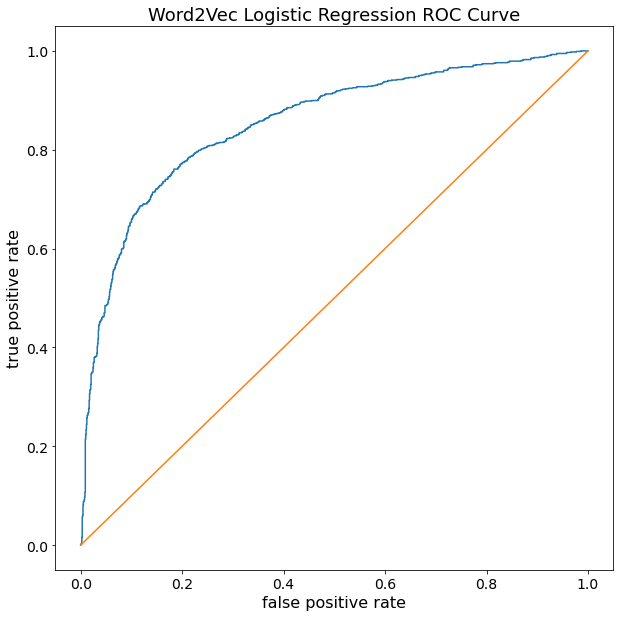

In [66]:
fig_1 = plt.figure(figsize=(10,10))
plt.plot(roc_curve_lr[0], roc_curve_lr[1])
plt.plot([0,1], [0,1])
# plt.plot(roc_curve_rf[0], roc_curve_lr[1])
# plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.title("Word2Vec Logistic Regression ROC Curve", fontsize=18)
plt.xlabel('false positive rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# GloVe model Using Spacy

In [ ]:
# download large GloVe model
# !python -m spacy download en_vectors_web_lg

In [ ]:
# Load GloVe model
GloVe_nlp = spacy.load('en_vectors_web_lg')

In [ ]:
# tokenize training tweets with trained GloVe model
glove_trained_tweet_tokens = []
for tweet in X_train_list:
  glove_trained_tweet_tokens.append(GloVe_nlp(tweet))

In [ ]:
# tokenize testing tweets with trained GloVe model
glove_test_tweet_tokens = []
for tweet in X_test_list:
  glove_test_tweet_tokens.append(GloVe_nlp(tweet))

In [ ]:
# vectorize training tokens
glove_trained_tweet_vectors = []
for token in glove_trained_tweet_tokens:
  glove_trained_tweet_vectors.append(token.vector)

In [ ]:
# vectorize test tokens
glove_test_tweet_vectors = []
for token in glove_test_tweet_tokens:
  glove_test_tweet_vectors.append(token.vector)

#Embedding: GLoVE, Classifier: Logistic Regression

In [ ]:
# fit data to logistic regression
glove_lr = LogisticRegression(n_jobs=-1).fit(glove_trained_tweet_vectors, y_train_list)

In [ ]:
# find score of training data and test data
glove_lr_train_score = glove_lr.score(glove_trained_tweet_vectors, y_train_list)
glove_lr_test_score = glove_lr.score(glove_test_tweet_vectors, y_test_list)

In [ ]:
# print staticically relevant data
print('train score = ', glove_lr_train_score)
print('test score = ', glove_lr_test_score)
print(classification_report(y_test_list, glove_lr.predict(test_tweet_vectors)))

train score =  0.8151623193844999
test score =  0.7942206654991243
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1318
           1       0.77      0.73      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.79      0.79      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
# With hyper tuned parameters
dist = dict(C=uniform(loc=0, scale=4),solver =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], max_iter= np.linspace(100, 1000, num=10))
rdm_mdl_glove_lr = RandomizedSearchCV(glove_lr, dist, random_state = 61, verbose = 3, n_jobs=-1)

rdm_mdl_glove_lr_search = rdm_mdl_glove_lr.fit(train_tweet_vectors, y_train_list)
print(rdm_mdl_glove_lr_search.best_params_)

rdm_mdl_glove_lr_test_score = rdm_mdl_glove_lr_search.score(test_tweet_vectors, y_test_list)
print(rdm_mdl_glove_lr_test_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.7s finished


{'C': 0.1594926960689973, 'max_iter': 600.0, 'solver': 'lbfgs'}
0.8007880910683012


In [ ]:
# print staticically relevant data
print(classification_report(y_test_list, rdm_mdl_glove_lr_search.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.73      0.76       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [ ]:
# find confidence scores for roc curve
glove_conf_scores = rdm_mdl_glove_lr_search.decision_function(test_tweet_vectors)

In [ ]:
# Obtain roc curve
glove_roc_curve_lr = roc_curve(y_test_list, glove_conf_scores)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

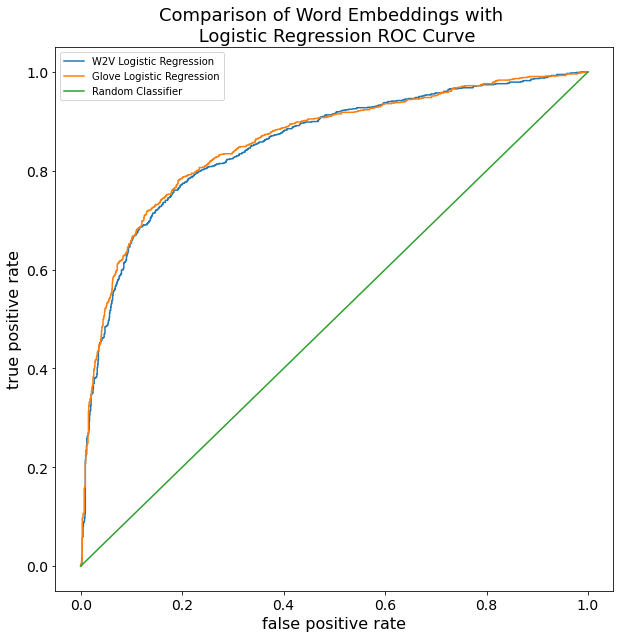

In [ ]:
fig_1 = plt.figure(figsize=(10,10))
plt.plot(roc_curve_lr[0], roc_curve_lr[1], label= "W2V Logistic Regression")
plt.plot(glove_roc_curve_lr[0], glove_roc_curve_lr[1], label= "Glove Logistic Regression")
plt.plot([0,1], [0,1], label= "Random Classifier")
plt.legend()
# plt.plot(roc_curve_rf[0], roc_curve_lr[1])
# plt.plot(roc_curve_xgb[0], roc_curve_xgb[1])
plt.title("Comparison of Word Embeddings with \n Logistic Regression ROC Curve", fontsize=18)
plt.xlabel('false positive rate', fontsize=16)
plt.ylabel('true positive rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Embedding: GloVe, Classifier: Random Forest

In [ ]:
# fit classifier to trained model
glove_rf = RandomForestClassifier(n_jobs=-1).fit(glove_trained_tweet_vectors, y_train_list)

In [ ]:
# Obtain score for train data and test data
glove_rf_train_score = glove_rf.score(glove_trained_tweet_vectors, y_train_list)
glove_rf_test_score = glove_rf.score(glove_test_tweet_vectors, y_test_list)

In [ ]:
# find statistically relevant data
print('train score = ', glove_rf_train_score)
print('test score = ', glove_rf_test_score)
print(classification_report(y_test_list, glove_rf.predict(test_tweet_vectors)))

train score =  0.9885531994745731
test score =  0.809106830122592
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      1318
           1       0.84      0.68      0.75       966

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.81      0.81      0.81      2284



In [ ]:
# Hyper tune parameters
glove_rf_dist = dict(n_estimators = randint(1,200), max_features =['sqrt', 'log2'], max_depth=[np.linspace(20, 200, num=10), np.logspace(2, 3, base=2)], min_samples_split=[np.linspace(20, 200, num=10), np.logspace(2, 3, base=2)])

rdm_mdl_glove_rf = RandomizedSearchCV(glove_rf, w2v_rf_dist, random_state= 1708, verbose=3, n_jobs =-1)

rdm_mdl_glove_rf_srch = rdm_mdl_glove_rf.fit(train_tweet_vectors, y_train_list)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


In [ ]:
# find best tuning parameters
print(rdm_mdl_glove_rf_srch.best_params_)

{'max_features': 'log2', 'n_estimators': 199}


In [ ]:
# find accuracy of tuned model
rdm_mdl_glove_rf_test_score =rdm_mdl_glove_rf_srch.score(test_tweet_vectors, y_test_list)
print(rdm_mdl_glove_rf_test_score)

0.8169877408056042


In [ ]:
# find statistically relevant data
print(classification_report(y_test_list, rdm_mdl_glove_rf_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1318
           1       0.86      0.67      0.76       966

    accuracy                           0.82      2284
   macro avg       0.83      0.80      0.81      2284
weighted avg       0.82      0.82      0.81      2284



#Embedding: GloVe, Classifier: XGBoost

In [ ]:
# load XGBoost classifier
glove_xgb = xgb.XGBClassifier(objective="binary:logistic", n_jobs=-1, random_state= 42)

In [ ]:
# convert list of list to np array of fit the model
glove_trained_tweet_vectors = np.asarray(glove_trained_tweet_vectors)
glove_xgb = glove_xgb.fit(glove_trained_tweet_vectors, y_train_list)

In [ ]:
# find statistically relevant data
glove_xgb_train_score = glove_xgb.score(glove_trained_tweet_vectors, y_train_list)
glove_xgb_test_score = glove_xgb.score(glove_test_tweet_vectors, y_test_list)

In [ ]:
print('train score = ', glove_xgb_train_score)
print('test score = ', glove_xgb_test_score)
print(classification_report(y_test_list, glove_xgb.predict(test_tweet_vectors)))

train score =  0.8693938825295553
test score =  0.8213660245183888
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1318
           1       0.82      0.74      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.81      2284
weighted avg       0.82      0.82      0.82      2284



In [ ]:
# Hypertune parameters
rdm_mdl_glove_xgb_dist = dict(n_estimators = randint(1,300), learning_rate = uniform(loc=0.05, scale=.5))
rdm_mdl_glove_xgb = RandomizedSearchCV(glove_xgb, rdm_mdl_glove_xgb_dist, random_state=1708, verbose=3, n_jobs =-1)

rdm_mdl_glove_xgb_srch = rdm_mdl_glove_xgb.fit(train_tweet_vectors, y_train_list)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


In [ ]:
# Find best tuned parameters
print(rdm_mdl_glove_xgb_srch.best_params_)

{'learning_rate': 0.12712354107224427, 'n_estimators': 292}


In [ ]:
# score with the tuned model
rdm_mdl_glove_xgb_test_score =rdm_mdl_glove_xgb.score(test_tweet_vectors, y_test_list)
print(rdm_mdl_glove_xgb_test_score)

0.8248686514886164


In [ ]:
# Find statistically relevant data
print(classification_report(y_test_list, rdm_mdl_glove_xgb_srch.predict(test_tweet_vectors)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1318
           1       0.82      0.75      0.78       966

    accuracy                           0.82      2284
   macro avg       0.82      0.81      0.82      2284
weighted avg       0.82      0.82      0.82      2284



#Handling Out Of Vocabulary Words